In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


# Getting the data ready

### Loading DataSet

In [2]:
data = pd.read_csv("./input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data['status'] = data['status'].map({'Placed': 1, 'Not Placed': 0})
data.groupby("status").count()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
status,,,,,,,,,,,,,,
0,67,67,67,67,67,67,67,67,67,67,67,67,67,0
1,148,148,148,148,148,148,148,148,148,148,148,148,148,148


### Splitting Between X and y

In [5]:
X = data.drop(["sl_no","status","salary"],axis=1)
y= data["status"]

In [6]:
X.head(3),y.head(3)

(  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
 0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
 1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
 2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
 
   workex  etest_p specialisation  mba_p  
 0     No     55.0         Mkt&HR  58.80  
 1    Yes     86.5        Mkt&Fin  66.28  
 2     No     75.0        Mkt&Fin  57.80  ,
 0    1
 1    1
 2    1
 Name: status, dtype: int64)

#### Converting Categorical Data to Numerical

In [7]:
X_dummy = pd.get_dummies(X)
X_dummy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0


### Train and Test Data Split

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(X_dummy,y,test_size=0.2)

# Choosing the right maching learning estimator/aglorithm/model 
and Fitting  chosen machine learning model to data and using it to make a prediction

### Model Fitting

In [9]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7906976744186046

### Using Model to produce predictions

In [10]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([1, 1, 1, 0, 1])

# Evaluation of Model

### Scoring Metrics

#### Accuracy Score

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7906976744186046

#### Prediction Probability

In [12]:
clf.predict_proba(X_test[:5])

array([[0.1 , 0.9 ],
       [0.11, 0.89],
       [0.04, 0.96],
       [0.65, 0.35],
       [0.04, 0.96]])

#### Cross Validation Score

In [13]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(clf,X_dummy,y,cv=6)

array([0.88888889, 0.86111111, 0.88888889, 0.88888889, 0.83333333,
       0.82857143])

#### Single Score vs Cross Validation Score

In [14]:
np.random.seed(42)
clf_single_score = clf.score(X_test,y_test)
clf_crossval_score = np.mean(cross_val_score(clf,X_dummy,y,cv=6))
pd.DataFrame([{"Classification Single Score":clf_single_score,"Cross Validation Score":clf_crossval_score}])

,Classification Single Score,Cross Validation Score
0,0.790698,0.864947


### Area under Receiver Operating Characteristic Curve (ROC)

In [15]:
from sklearn.metrics import roc_curve
y_prob = clf.predict_proba(X_test)
y_positive = y_prob[:,1]

#Calculate false positive rate, true positive rate and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.25      , 0.25      , 0.41666667, 0.41666667, 0.5       ,
       0.5       , 0.66666667, 0.66666667, 0.75      , 0.91666667,
       1.        ])

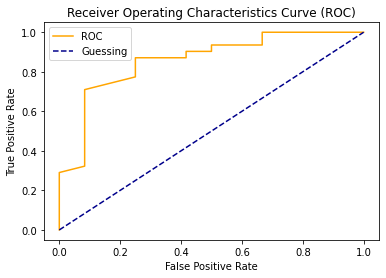

In [16]:
import matplotlib.pyplot as plt
def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics Curve (ROC)")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)

#### ROC Score

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_positive)

0.8588709677419354

### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 6,  6],
       [ 3, 28]])

#### Visualizing Confusion Matrix

In [19]:
pd.crosstab(y_test,y_pred,
           rownames=["Actual Label"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,6,6
1,3,28


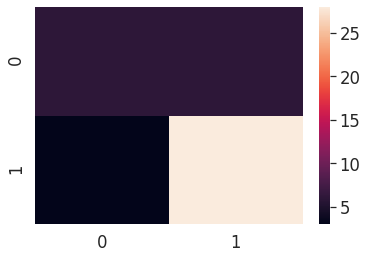

In [20]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat);

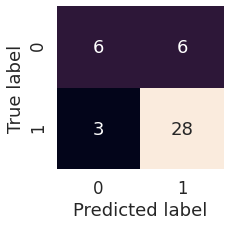

In [21]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

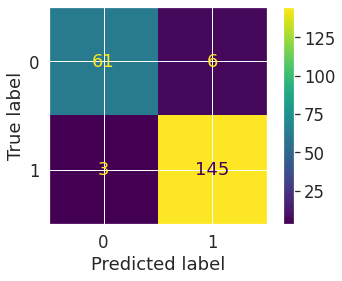

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_dummy, y)

### Classification Report
* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43



### Using Scoring Parameter

In [24]:
np.random.seed(42)
#Default- Mean Accuracy
cv_acc = cross_val_score(clf,X_dummy,y,cv=5)
#Cross Validated Score
print(f"The Cross Validated Accuracy : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Accuracy : 85.12%


In [25]:
np.random.seed(42)
#Accuracy Param
cv_acc = cross_val_score(clf,X_dummy,y,cv=5,scoring="accuracy")
#Cross Validated Score
print(f"The Cross Validated Accuracy : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Accuracy : 85.12%


In [26]:
np.random.seed(42)
#Precision Param
cv_acc = cross_val_score(clf,X_dummy,y,cv=5,scoring="precision")
print(f"The Cross Validated Precision : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Precision : 86.57%


In [27]:
np.random.seed(42)
#Recall Param
cv_acc = cross_val_score(clf,X_dummy,y,cv=5,scoring="recall")
print(f"The Cross Validated Recall : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated Recall : 93.10%


In [28]:
np.random.seed(42)
#F1 Param
cv_acc = cross_val_score(clf,X_dummy,y,cv=5,scoring="f1")
print(f"The Cross Validated F1 score : {np.mean(cv_acc)*100:.2f}%")

The Cross Validated F1 score : 89.39%


### Classification Functions

In [29]:
def classification_metrics(y_test,y_pred):
    from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
    print("Classification Metrics: ")
    print(f"Accuracy: {accuracy_score(y_test,y_pred)*100 :.2f}%")
    print(f"Precision: {precision_score(y_test,y_pred)*100 :.2f}%")
    print(f"Recall: {recall_score(y_test,y_pred)*100 :.2f}%")
    print(f"F1: {f1_score(y_test,y_pred)*100 :.2f}%")
    metric_dict = {"accuracy": round(accuracy_score(y_test,y_pred), 2),
                   "precision": round(precision_score(y_test,y_pred), 2), 
                   "recall": round(recall_score(y_test,y_pred), 2),
                   "f1": round(f1_score(y_test,y_pred), 2)}
    return metric_dict
base_metrics = classification_metrics(y_test,y_pred)

Classification Metrics: 
Accuracy: 79.07%
Precision: 82.35%
Recall: 90.32%
F1: 86.15%


# Improving model predictions through Experimentation (Hyperparameter Tuning)

In [30]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning using `RandomizedSearchCV`

In [31]:
grid = {"n_estimators":[10,100,500,1000,1500,2000],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

In [32]:
np.random.seed(42)
clf= RandomForestClassifier(n_jobs=1)
from sklearn.model_selection import RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                   param_distributions=grid,
                   n_iter=100, #Increasing too 100 from 20
                   cv=5,
                   verbose=2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 500, 1000,
                                                         1500, 2000]},
                   verbose=2)

In [33]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [34]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = classification_metrics(y_test,rs_y_preds)

Classification Metrics: 
Accuracy: 81.40%
Precision: 82.86%
Recall: 93.55%
F1: 87.88%


### Hyperparameter tuning using `GridSearchCV`

In [35]:
grid_2 = {'n_estimators':[2000,2500,3000],
         'max_depth':[10],
         'max_features':['auto','sqrt'],
         'min_samples_split':[2,4],
         'min_samples_leaf':[2]}

In [36]:
pd.DataFrame([grid,grid_2],index=['Grid1','Grid2'])

,n_estimators,max_depth,max_features,min_samples_split,min_samples_leaf
Grid1,"[10, 100, 500, 1000, 1500, 2000]","[None, 5, 10, 20, 30]","[auto, sqrt]","[2, 4, 6]","[1, 2, 4]"
Grid2,"[2000, 2500, 3000]",[10],"[auto, sqrt]","[2, 4]",[2]


In [37]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)

gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2500; total time=   4.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2500; total time=   4.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

In [38]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 2500}

In [39]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics= classification_metrics(y_test,gs_y_preds)

Classification Metrics: 
Accuracy: 79.07%
Precision: 80.56%
Recall: 93.55%
F1: 86.57%


<AxesSubplot:>

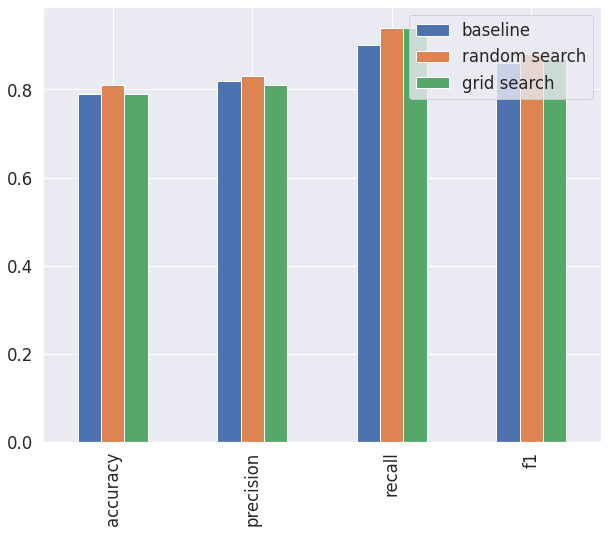

In [40]:
compare_metrics = pd.DataFrame({"baseline": base_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8))

# Saving and Loading Model for later use

In [41]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [42]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [43]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
classification_metrics(y_test, pickle_y_preds)

Classification Metrics: 
Accuracy: 79.07%
Precision: 80.56%
Recall: 93.55%
F1: 86.57%


{'accuracy': 0.79, 'precision': 0.81, 'recall': 0.94, 'f1': 0.87}